In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
from datetime import datetime
from scipy.stats import chi2_contingency
from scipy.stats import chi2
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn')

# EDA

In [146]:
df = pd.read_csv('kc_house_data_train.csv')

In [147]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [148]:
corr = df.corr()

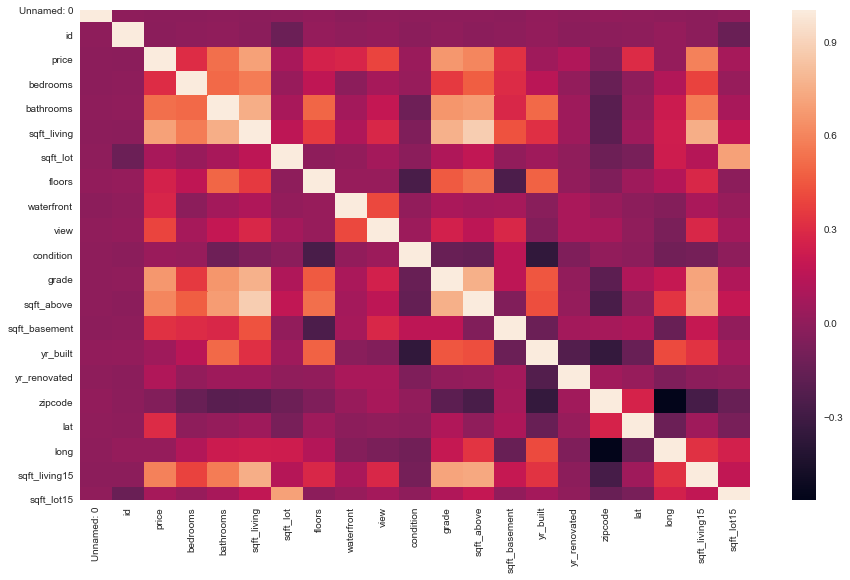

In [153]:
plt.figure(figsize=(15,9))
sns.heatmap(corr)


## Geoprice Feature

In [161]:
df['geolat'] = df['lat'].apply(lambda x: 1 if (x >47.5) & (x < 47.7) else 0)
df['geolong'] = df['long'].apply(lambda x: 1 if (x >-122.4) & (x < -122.0) else 0)                
df['geoprice'] = df.geolat + df.geolong



df.geoprice = np.where(df.geoprice == 2, 1, 0)

In [162]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geolat,geolong,geoprice
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,1,0
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,1,1,1
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,1,1,1
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,1,1,1
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,1,1,1


In [163]:
model = ols('price~sqft_living+bedrooms', data=df).fit()

In [164]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     8949.
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:19:45   Log-Likelihood:            -2.4022e+05
No. Observations:               17290   AIC:                         4.805e+05
Df Residuals:                   17287   BIC:                         4.805e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.897e+04   7435.453      9.276      0.000    5.44e+04    8.35e+04
sqft_living   318.4894      2.634    120.926      0.000     313.327     323.652
bedrooms    -5.668e+04   2579.558    -21.973      0.000   -6.17e+04   -5.16e+04
==============================================================================
Omnibus:                    12019.532   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           456776.832
Skew:                           2.867   Prob(JB):                         0.00
Kurtosis:                      27.519   Cond. No.                     8.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
df['price_range'] = df['price'].apply(lambda x: 0 if x < 321000 else (1 if x < 645000 else 2))

/Users/braytonhall/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


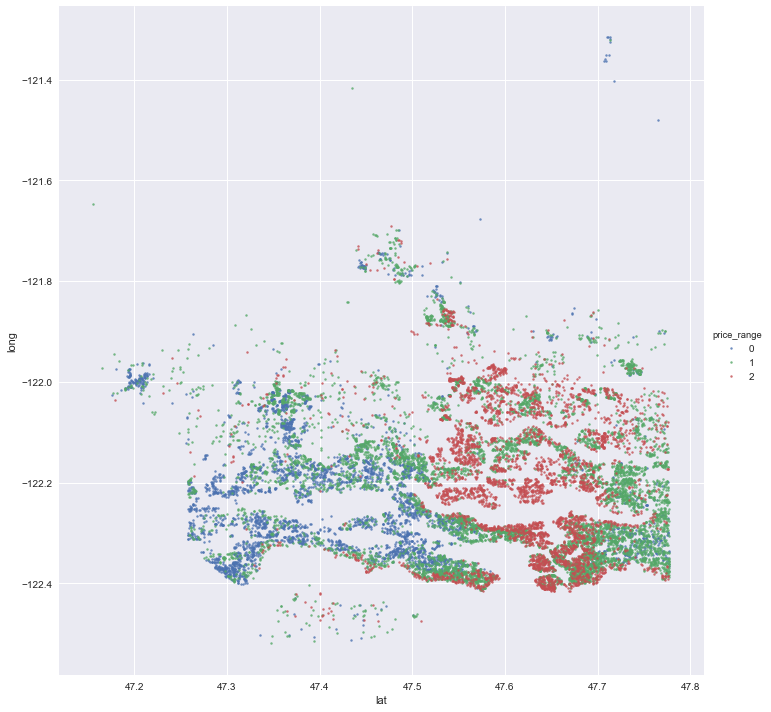

In [166]:
sns.lmplot(x = 'lat', y='long', data=df, hue = 'price_range', fit_reg = False, size=10, scatter_kws={"s": 6})
plt.show()

In [167]:
df2 = df[['price', 'geoprice', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'yr_built', 'sqft_lot','grade', 'condition', 'zipcode', 'sqft_living15']]

In [191]:
df2

,price,geoprice,bedrooms,bathrooms,sqft_living,floors,waterfront,yr_built,sqft_lot,grade,condition,zipcode,sqft_living15
0,365000.0,0,4,2.25,2070,2.0,0,1986,8893,8,4,98058,2390
1,865000.0,1,5,3.00,2900,1.0,0,1977,6730,8,5,98115,2370
2,1038000.0,1,4,2.50,3770,2.0,0,1997,10893,11,3,98006,3710
3,1490000.0,1,3,3.50,4560,2.0,0,1990,14608,12,3,98034,4050
4,711000.0,1,3,2.50,2550,2.0,0,2004,5376,9,3,98052,2250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,1,5,2.50,3240,1.0,0,1958,9960,8,3,98008,2730
17286,440000.0,1,2,1.75,1300,2.0,0,1948,4000,7,3,98105,1350
17287,310000.0,0,3,1.00,1050,1.0,0,1953,9876,7,3,98028,1760
17288,427500.0,0,3,1.50,1900,1.5,0,1971,43186,7,4,98038,2080


In [168]:
corr = df2.corr()

In [169]:
corr

,price,geoprice,bedrooms,bathrooms,sqft_living,floors,waterfront,yr_built,sqft_lot,grade,condition,zipcode,sqft_living15
price,1.000000,0.340267,0.305106,0.524335,0.703540,0.256985,0.275779,0.056450,0.086803,0.666215,0.036099,-0.048958,0.585567
geoprice,0.340267,1.000000,0.006613,0.044684,0.051100,0.098324,0.005894,-0.204491,-0.143533,0.128059,0.048028,0.121560,0.035454
bedrooms,0.305106,0.006613,1.000000,0.507867,0.570428,0.172975,-0.008581,0.153769,0.029375,0.354679,0.025266,-0.147515,0.387589
bathrooms,0.524335,0.044684,0.507867,1.000000,0.755270,0.497967,0.065848,0.507761,0.085470,0.664191,-0.122976,-0.201527,0.568080
sqft_living,0.703540,0.051100,0.570428,0.755270,1.000000,0.357169,0.109738,0.319397,0.166810,0.762929,-0.061530,-0.195893,0.755066
floors,0.256985,0.098324,0.172975,0.497967,0.357169,1.000000,0.025132,0.483657,-0.002205,0.458984,-0.259230,-0.060560,0.283933
waterfront,0.275779,0.005894,-0.008581,0.065848,0.109738,0.025132,1.000000,-0.021981,0.015356,0.092234,0.009608,0.034282,0.091090
yr_built,0.056450,-0.204491,0.153769,0.507761,0.319397,0.483657,-0.021981,1.000000,0.054228,0.448003,-0.358921,-0.348366,0.332340
sqft_lot,0.086803,-0.143533,0.029375,0.085470,0.166810,-0.002205,0.015356,0.054228,1.000000,0.110320,-0.013715,-0.126590,0.136959
grade,0.666215,0.128059,0.354679,0.664191,0.762929,0.458984,0.092234,0.448003,0.110320,1.000000,-0.142066,-0.184946,0.715745


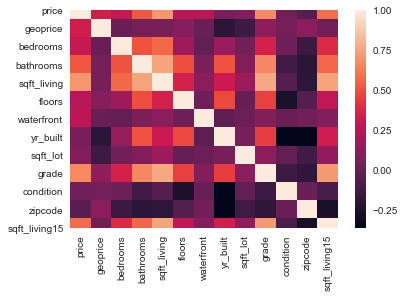

In [170]:
sns.heatmap(corr)

In [171]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geolat,geolong,geoprice,price_range
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,1,0,1
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,1,1,1,2
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,1,1,1,2
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,1,1,1,2
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,1,1,1,2


In [172]:
zipdum = pd.get_dummies(df2.zipcode)
zipdum

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [187]:
df3 = pd.concat([df2, zipdum], axis='columns')

In [189]:
df3 = df3.drop(columns='zipcode', axis=1)

In [192]:
df3

,price,geoprice,bedrooms,bathrooms,sqft_living,floors,waterfront,yr_built,sqft_lot,grade,condition,sqft_living15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,365000.0,0,4,2.25,2070,2.0,0,1986,8893,8,4,2390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,865000.0,1,5,3.00,2900,1.0,0,1977,6730,8,5,2370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1038000.0,1,4,2.50,3770,2.0,0,1997,10893,11,3,3710,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1490000.0,1,3,3.50,4560,2.0,0,1990,14608,12,3,4050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,711000.0,1,3,2.50,2550,2.0,0,2004,5376,9,3,2250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,1,5,2.50,3240,1.0,0,1958,9960,8,3,2730,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,440000.0,1,2,1.75,1300,2.0,0,1948,4000,7,3,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,310000.0,0,3,1.00,1050,1.0,0,1953,9876,7,3,1760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,427500.0,0,3,1.50,1900,1.5,0,1971,43186,7,4,2080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [193]:
df3.columns = df3.columns.astype(str)

In [194]:
type(df3.columns[90])

IndexError: index 90 is out of bounds for axis 0 with size 82

In [195]:
df3

,price,geoprice,bedrooms,bathrooms,sqft_living,floors,waterfront,yr_built,sqft_lot,grade,condition,sqft_living15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,365000.0,0,4,2.25,2070,2.0,0,1986,8893,8,4,2390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,865000.0,1,5,3.00,2900,1.0,0,1977,6730,8,5,2370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1038000.0,1,4,2.50,3770,2.0,0,1997,10893,11,3,3710,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1490000.0,1,3,3.50,4560,2.0,0,1990,14608,12,3,4050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,711000.0,1,3,2.50,2550,2.0,0,2004,5376,9,3,2250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,1,5,2.50,3240,1.0,0,1958,9960,8,3,2730,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,440000.0,1,2,1.75,1300,2.0,0,1948,4000,7,3,1350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,310000.0,0,3,1.00,1050,1.0,0,1953,9876,7,3,1760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17288,427500.0,0,3,1.50,1900,1.5,0,1971,43186,7,4,2080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [234]:
regcol = df3.columns[:12]
regcol.remove('waterfront', 'yr_built')


AttributeError: 'Index' object has no attribute 'remove'

In [216]:
zipcolfix = []
for i in df3.columns[12:]:
    zipcolfix.append('Q("' + i + '")')

In [231]:
zipcolfix.remove('Q("98001")')

In [232]:
fin_zip_col = list(regcol) + list(zipcolfix)

In [233]:
fin_zip_col

['price',
 'geoprice',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'yr_built',
 'sqft_lot',
 'grade',
 'condition',
 'sqft_living15',
 'Q("98002")',
 'Q("98003")',
 'Q("98004")',
 'Q("98005")',
 'Q("98006")',
 'Q("98007")',
 'Q("98008")',
 'Q("98010")',
 'Q("98011")',
 'Q("98014")',
 'Q("98019")',
 'Q("98022")',
 'Q("98023")',
 'Q("98024")',
 'Q("98027")',
 'Q("98028")',
 'Q("98029")',
 'Q("98030")',
 'Q("98031")',
 'Q("98032")',
 'Q("98033")',
 'Q("98034")',
 'Q("98038")',
 'Q("98039")',
 'Q("98040")',
 'Q("98042")',
 'Q("98045")',
 'Q("98052")',
 'Q("98053")',
 'Q("98055")',
 'Q("98056")',
 'Q("98058")',
 'Q("98059")',
 'Q("98065")',
 'Q("98070")',
 'Q("98072")',
 'Q("98074")',
 'Q("98075")',
 'Q("98077")',
 'Q("98092")',
 'Q("98102")',
 'Q("98103")',
 'Q("98105")',
 'Q("98106")',
 'Q("98107")',
 'Q("98108")',
 'Q("98109")',
 'Q("98112")',
 'Q("98115")',
 'Q("98116")',
 'Q("98117")',
 'Q("98118")',
 'Q("98119")',
 'Q("98122")',
 'Q("98125")',
 'Q("98126")',


In [226]:
outcome = 'price'
predictors = fin_zip_col.drop(['price', 'Q("98001")'], axis=1)
pred_sum = '+'.join(fin_zip_col)
formula = outcome + '~' + pred_sum

AttributeError: 'list' object has no attribute 'drop'

In [184]:
formula

'price~date+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+geolat+geolong+geoprice+price_range+bed_bath+Q("98002")+Q("98003")+Q("98004")+Q("98005")+Q("98006")+Q("98007")+Q("98008")+Q("98010")+Q("98011")+Q("98014")+Q("98019")+Q("98022")+Q("98023")+Q("98024")+Q("98027")+Q("98028")+Q("98029")+Q("98030")+Q("98031")+Q("98032")+Q("98033")+Q("98034")+Q("98038")+Q("98039")+Q("98040")+Q("98042")+Q("98045")+Q("98052")+Q("98053")+Q("98055")+Q("98056")+Q("98058")+Q("98059")+Q("98065")+Q("98070")+Q("98072")+Q("98074")+Q("98075")+Q("98077")+Q("98092")+Q("98102")+Q("98103")+Q("98105")+Q("98106")+Q("98107")+Q("98108")+Q("98109")+Q("98112")+Q("98115")+Q("98116")+Q("98117")+Q("98118")+Q("98119")+Q("98122")+Q("98125")+Q("98126")+Q("98133")+Q("98136")+Q("98144")+Q("98146")+Q("98148")+Q("98155")+Q("98166")+Q("98168")+Q("98177")+Q("98178")+Q("98188")+Q("98198")'

In [220]:
modelzip = ols(formula, data=df3).fit()

PatsyError: Error evaluating factor: NameError: name 'geolong' is not defined
    price~date+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+geolat+geolong+geoprice+price_range+bed_bath+Q("98002")+Q("98003")+Q("98004")+Q("98005")+Q("98006")+Q("98007")+Q("98008")+Q("98010")+Q("98011")+Q("98014")+Q("98019")+Q("98022")+Q("98023")+Q("98024")+Q("98027")+Q("98028")+Q("98029")+Q("98030")+Q("98031")+Q("98032")+Q("98033")+Q("98034")+Q("98038")+Q("98039")+Q("98040")+Q("98042")+Q("98045")+Q("98052")+Q("98053")+Q("98055")+Q("98056")+Q("98058")+Q("98059")+Q("98065")+Q("98070")+Q("98072")+Q("98074")+Q("98075")+Q("98077")+Q("98092")+Q("98102")+Q("98103")+Q("98105")+Q("98106")+Q("98107")+Q("98108")+Q("98109")+Q("98112")+Q("98115")+Q("98116")+Q("98117")+Q("98118")+Q("98119")+Q("98122")+Q("98125")+Q("98126")+Q("98133")+Q("98136")+Q("98144")+Q("98146")+Q("98148")+Q("98155")+Q("98166")+Q("98168")+Q("98177")+Q("98178")+Q("98188")+Q("98198")
                                                                                                                                                                                              ^^^^^^^

In [201]:
modelzip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     160.5
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:22:51   Log-Likelihood:            -2.3181e+05
No. Observations:               17290   AIC:                         4.645e+05
Df Residuals:                   16829   BIC:                         4.681e+05
Df Model:                         460                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1.388e+08   1.25e+07    -11.108      0.000   -1.63e+08   -1.14e+08
date[T.20140503T000000]  1.112e+05    9.7e+04      1.146      0.252    -7.9e+04    3.01e+05
date[T.20140504T000000] -3.986e+04   8.48e+04     -0.470      0.638   -2.06e+05    1.26e+05
date[T.20140505T000000] -4.648e+04    3.1e+04     -1.501      0.134   -1.07e+05    1.42e+04
date[T.20140506T000000] -2.286e+04   2.98e+04     -0.766      0.444   -8.14e+04    3.56e+04
date[T.20140507T000000] -5032.4777   3.01e+04     -0.167      0.867   -6.41e+04     5.4e+04
date[T.20140508T000000]   546.1249   3.02e+04      0.018      0.986   -5.87e+04    5.98e+04
date[T.20140509T000000] -2.813e+04    3.1e+04     -0.909      0.364   -8.88e+04    3.26e+04
date[T.20140510T000000]  3.204e+04   9.71e+04      0.330      0.741   -1.58e+05    2.22e+05
date[T.20140511T000000]  3.984e+04   1.18e+05      0.338      0.735   -1.91e+05    2.71e+05
date[T.20140512T000000] -4.979e+04   3.01e+04     -1.652      0.099   -1.09e+05    9278.084
date[T.20140513T000000]  1.215e+04   3.02e+04      0.402      0.687   -4.71e+04    7.14e+04
date[T.20140514T000000] -2.031e+04   3.03e+04     -0.670      0.503   -7.97e+04    3.91e+04
date[T.20140515T000000] -8619.3574   3.03e+04     -0.284      0.776    -6.8e+04    5.08e+04
date[T.20140516T000000] -1.771e+04   3.07e+04     -0.576      0.564   -7.79e+04    4.25e+04
date[T.20140517T000000] -9.453e+04   1.65e+05     -0.573      0.567   -4.18e+05    2.29e+05
date[T.20140518T000000]  1734.2886   7.65e+04      0.023      0.982   -1.48e+05    1.52e+05
date[T.20140519T000000]  7008.7251   2.98e+04      0.236      0.814   -5.13e+04    6.53e+04
date[T.20140520T000000]  1933.7442   2.83e+04      0.068      0.946   -5.35e+04    5.74e+04
date[T.20140521T000000]  -436.7379   2.91e+04     -0.015      0.988   -5.74e+04    5.65e+04
date[T.20140522T000000] -1.416e+04   2.98e+04     -0.476      0.634   -7.25e+04    4.42e+04
date[T.20140523T000000] -3.594e+04      3e+04     -1.198      0.231   -9.48e+04    2.29e+04
date[T.20140524T000000]  2.204e+04   5.65e+04      0.390      0.696   -8.86e+04    1.33e+05
date[T.20140525T000000] -1.185e+05   8.49e+04     -1.396      0.163   -2.85e+05    4.79e+04
date[T.20140526T000000]  3.708e+04   6.21e+04      0.598      0.550   -8.46e+04    1.59e+05
date[T.20140527T000000] -2.192e+04    2.9e+04     -0.756      0.449   -7.87e+04    3.49e+04
date[T.20140528T000000] -9711.1114   2.82e+04     -0.344      0.731   -6.51e+04    4.56e+04
date[T.20140529T000000]  2.148e+04   3.12e+04      0.688      0.492   -3.97e+04    8.27e+04
date[T.20140530T000000] -1153.3677   3.24e+04     -0.036      0.972   -6.47e+04    6.23e+04
date[T.20140531T000000]  -366.7690   7.65e+04     -0.005      0.996    -1.5e+05     1.5e+05
date[T.20140601T000000] -7917.8702   7.05e+04  

# Grid Search and Cross Validation

# Testing

In [118]:
testing = pd.read_csv('kc_house_data_test_features.csv')

In [119]:
testing

,Unnamed: 0,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [124]:
testdf = testing[['bedrooms', 'sqft_living']]

In [125]:
testdf

,bedrooms,sqft_living
0,3,1180
1,3,2570
2,2,770
3,4,1960
4,3,1680
...,...,...
21608,3,1530
21609,4,2310
21610,2,1020
21611,3,1600


In [127]:
guesses = model.predict(testdf)

In [129]:
type(guesses)

pandas.core.series.Series

In [132]:
guesses.to_csv('brayton_guesses.csv', index=False)

/Users/braytonhall/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [131]:
guesses

0        274744.485526
1        717444.805338
2        200844.657677
3        466485.405700
4        433989.204883
             ...      
21608    386215.789076
21609    577956.709250
21610    280467.017355
21611    408510.049786
21612    280467.017355
Length: 21613, dtype: float64